In [1]:
import pandas as pd
import matplotlib.pyplot as plt
log_folder_path = "./log"
train_csv_file_path = log_folder_path + "/train_scoresv2.csv"
time_csv_file_path = log_folder_path + "/time_per_epochv2.csv"
test_csv_file_path = log_folder_path + "/test_scoresv2.csv"
loss_csv_file_path = log_folder_path + "/loss_per_epochv2.csv"

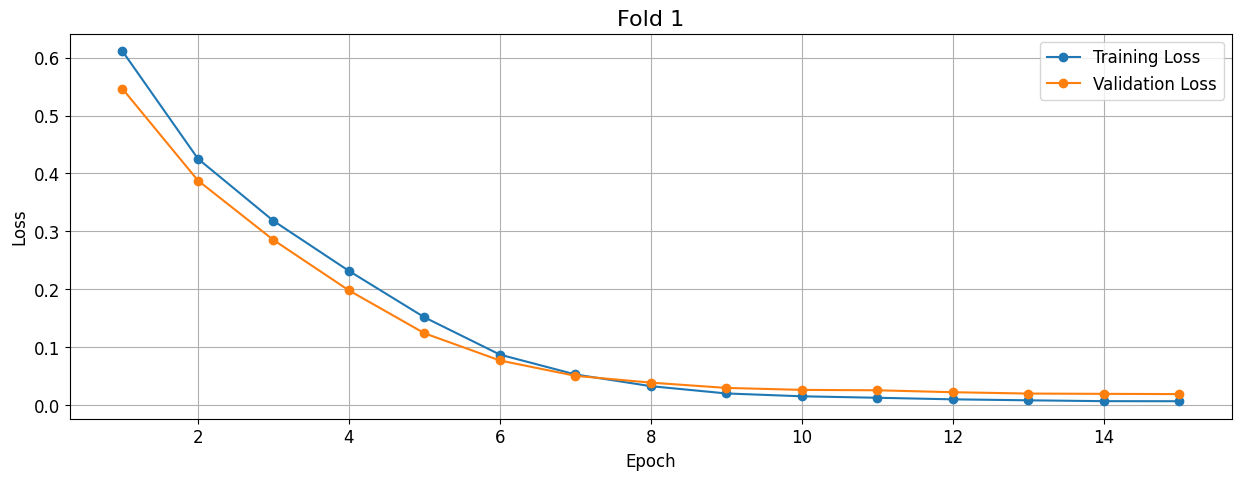

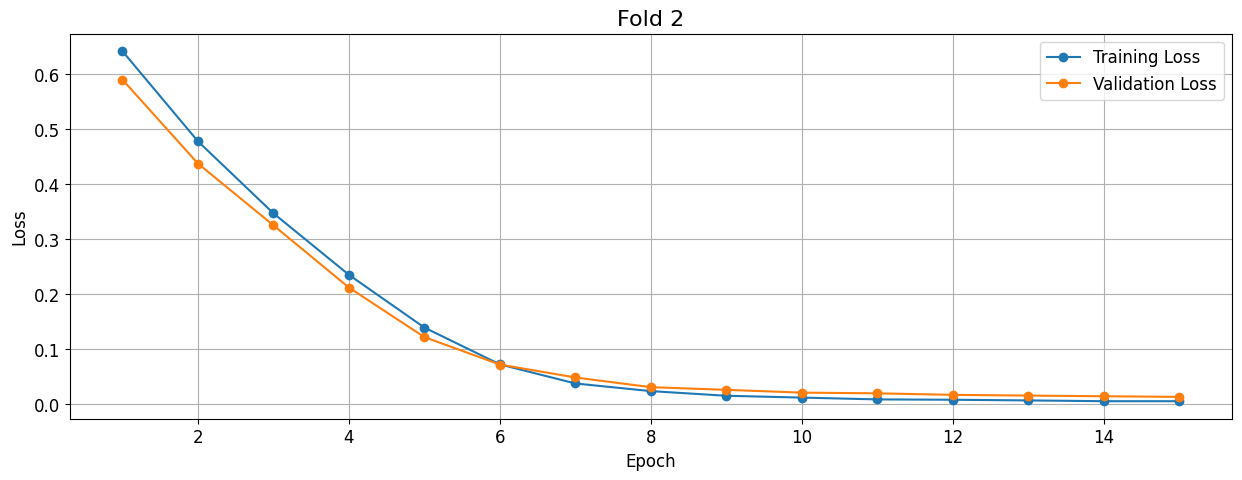

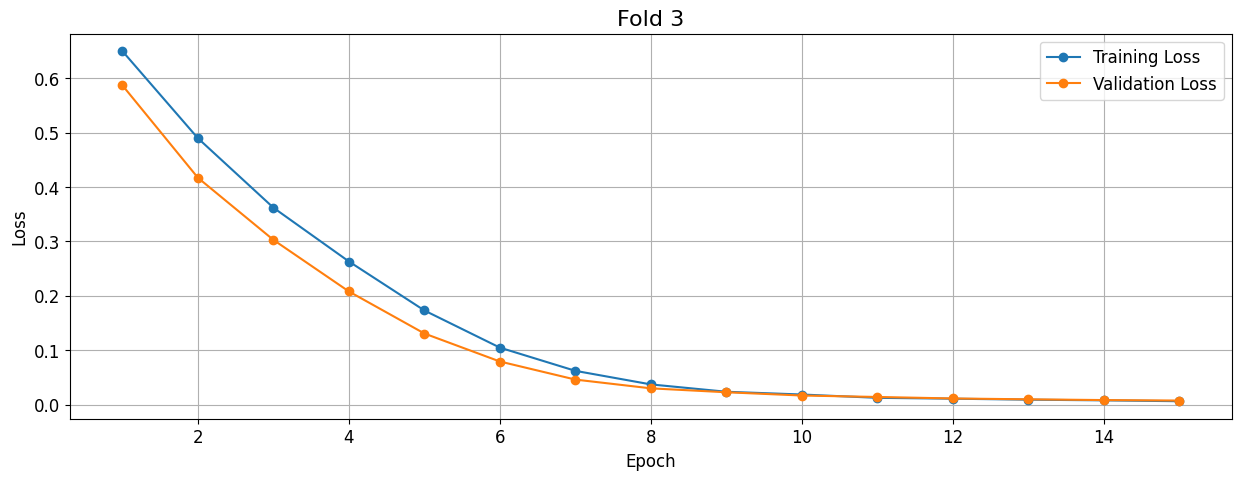

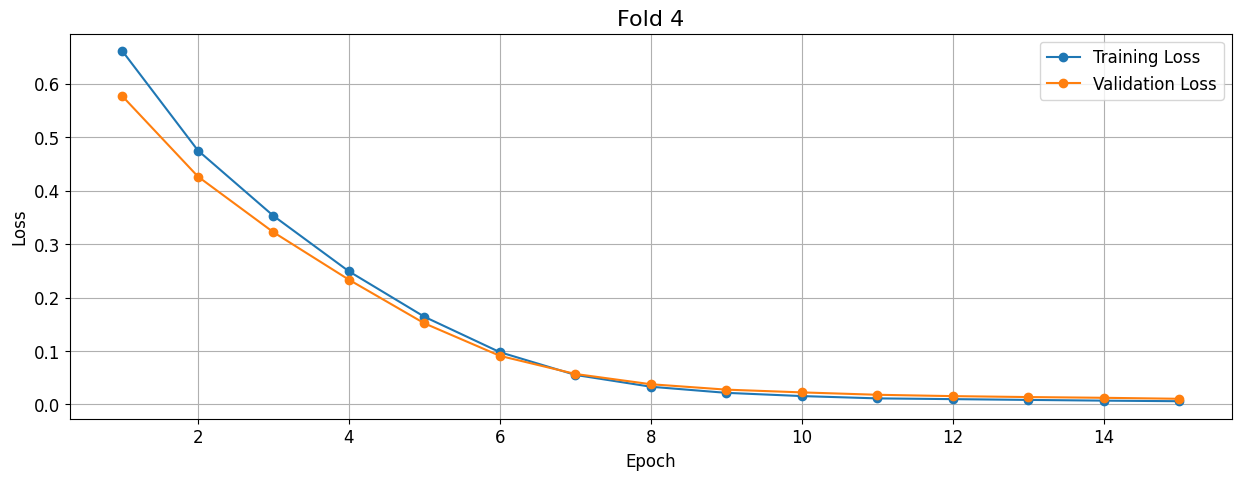

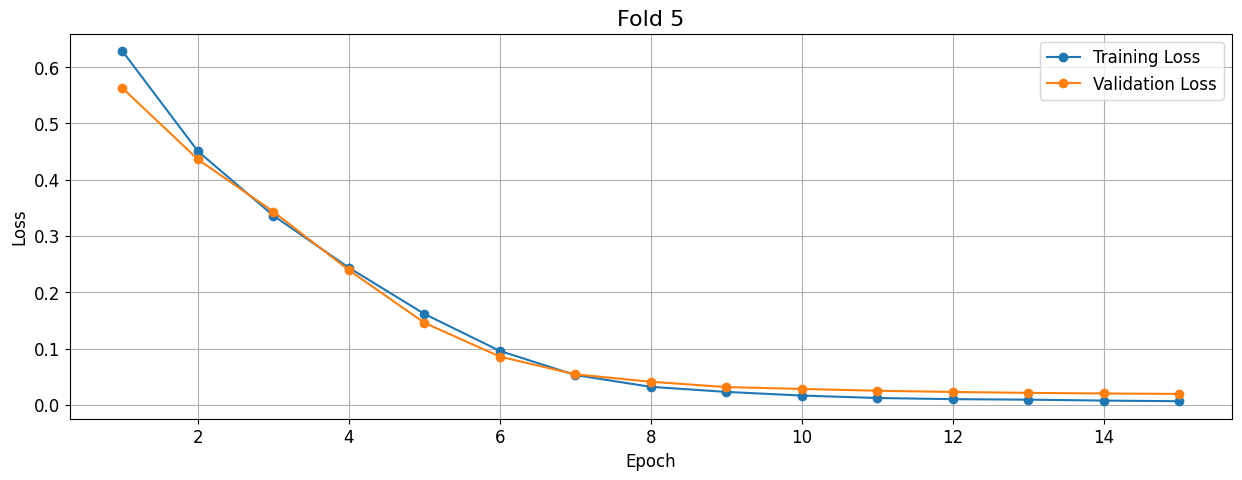

In [2]:
for fold in range (0, 5):
    loss_df = pd.read_csv(loss_csv_file_path)

    loss_df = loss_df[loss_df['fold'] == fold]

    plt.figure(figsize=(15, 5))

    plt.plot(loss_df['epoch'], loss_df['train_loss'], label='Training Loss', marker='o')

    plt.plot(loss_df['epoch'], loss_df['val_loss'], label='Validation Loss', marker='o')

    plt.title('Fold ' + str(fold + 1), fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(True)
    plt.show()

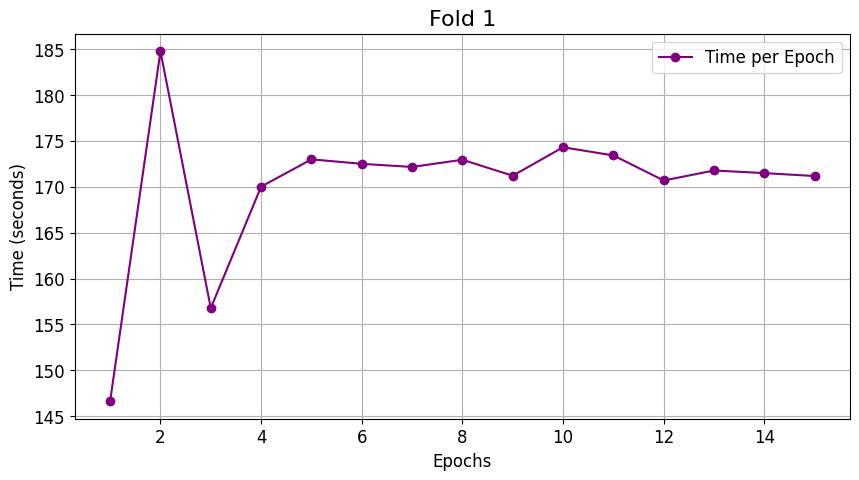

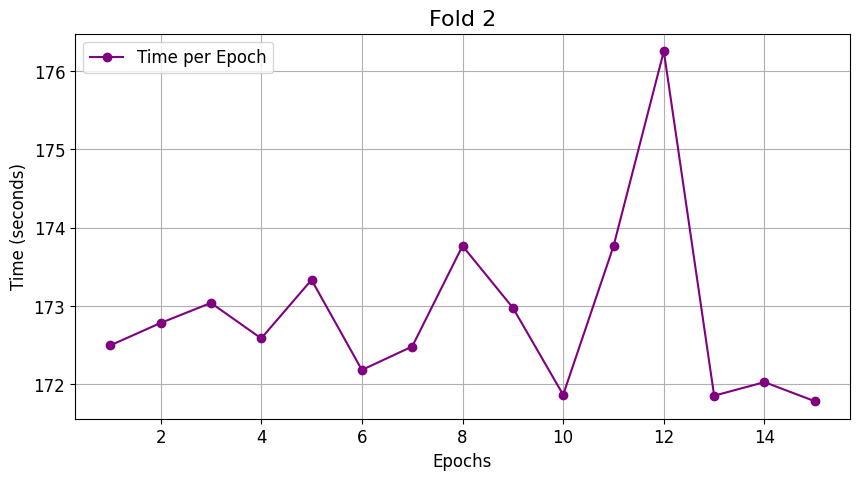

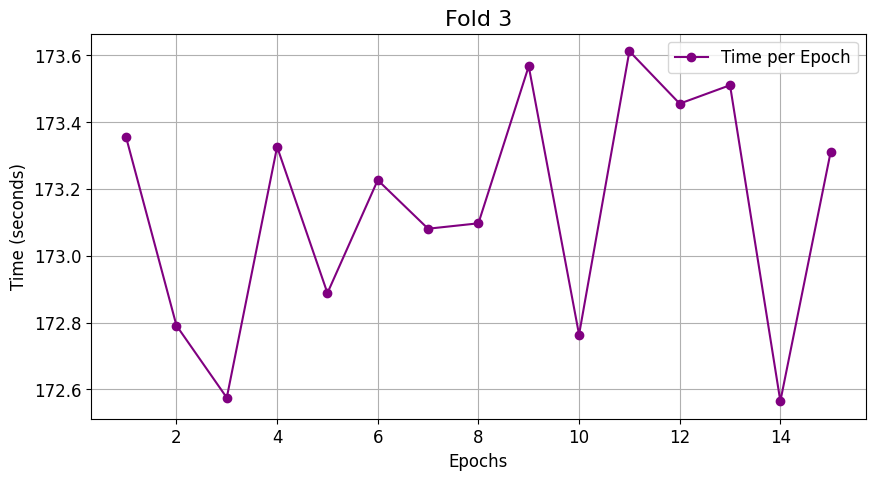

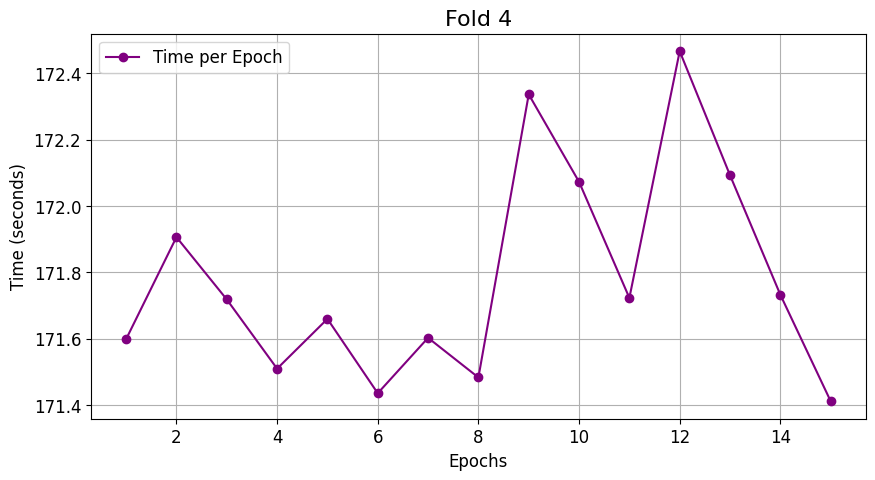

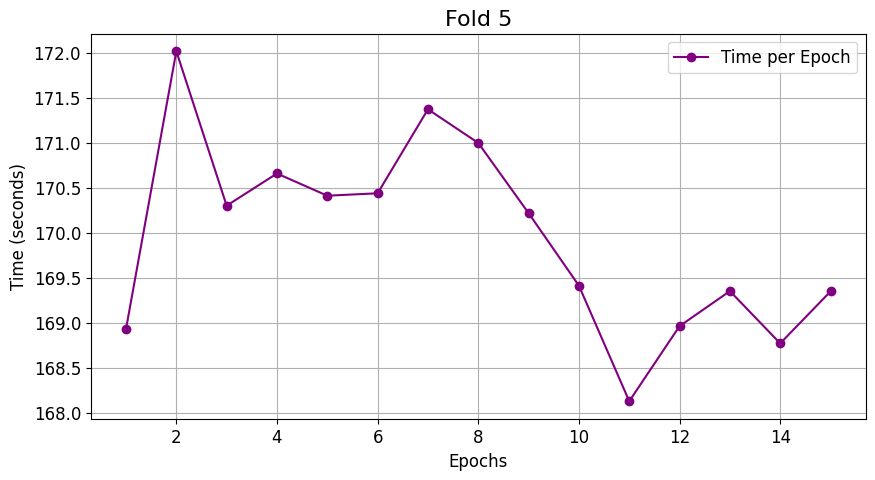

In [3]:
for fold in range (0, 5):
    time_df = pd.read_csv(time_csv_file_path)

    time_df = time_df[time_df['fold'] == fold]

    plt.figure(figsize=(10, 5))
    plt.plot(time_df['epoch'], time_df['time'], label='Time per Epoch', marker='o', color='purple')

    plt.title('Fold ' + str(fold + 1), fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(True)
    plt.show()

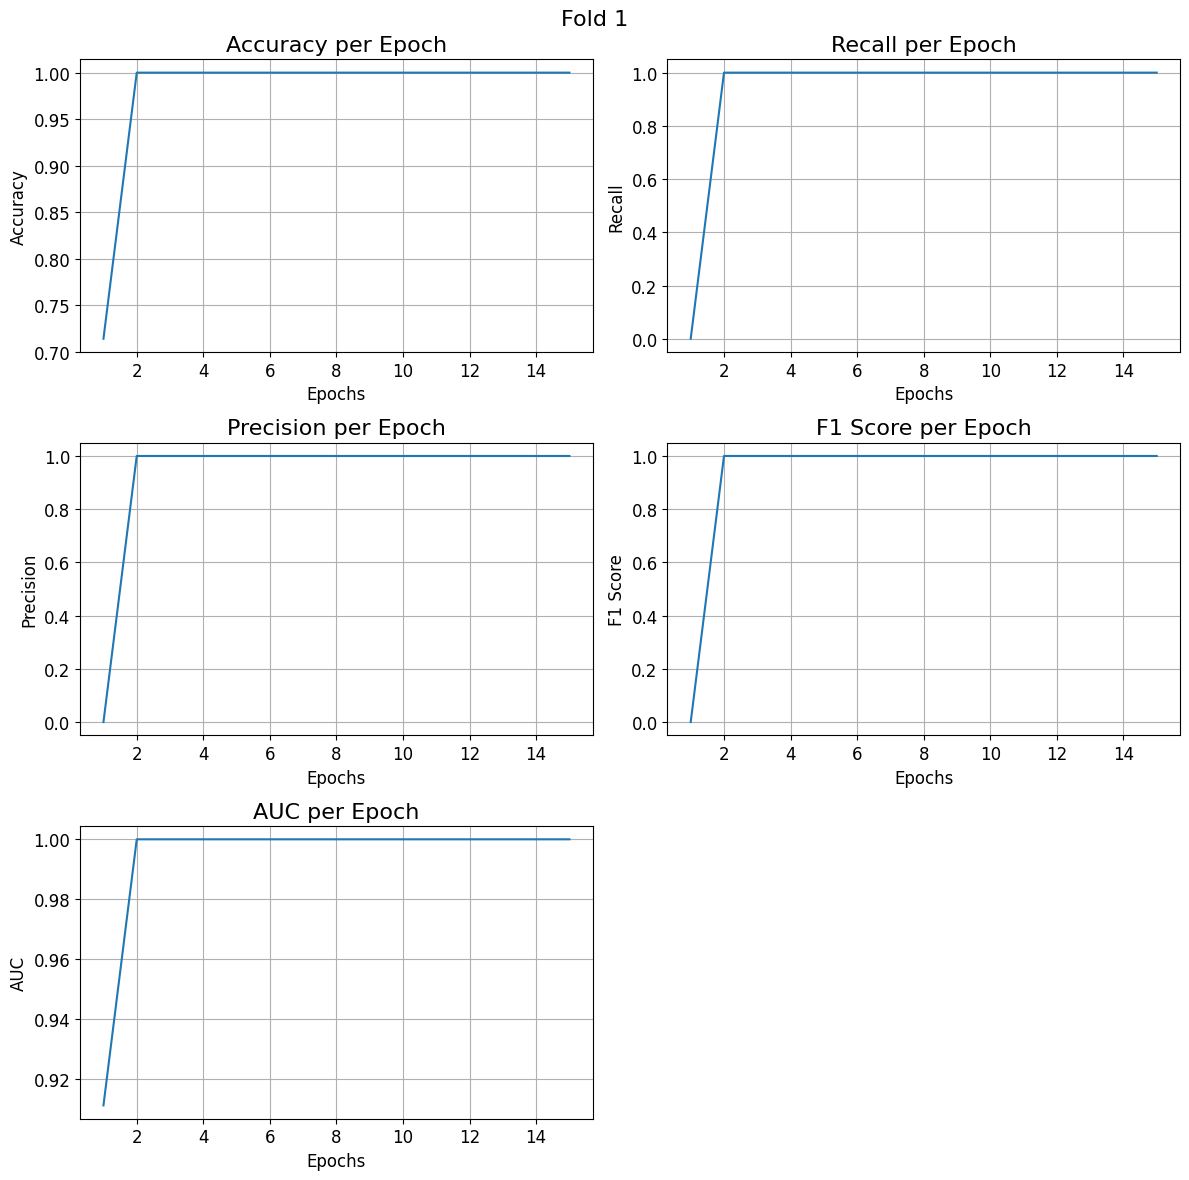

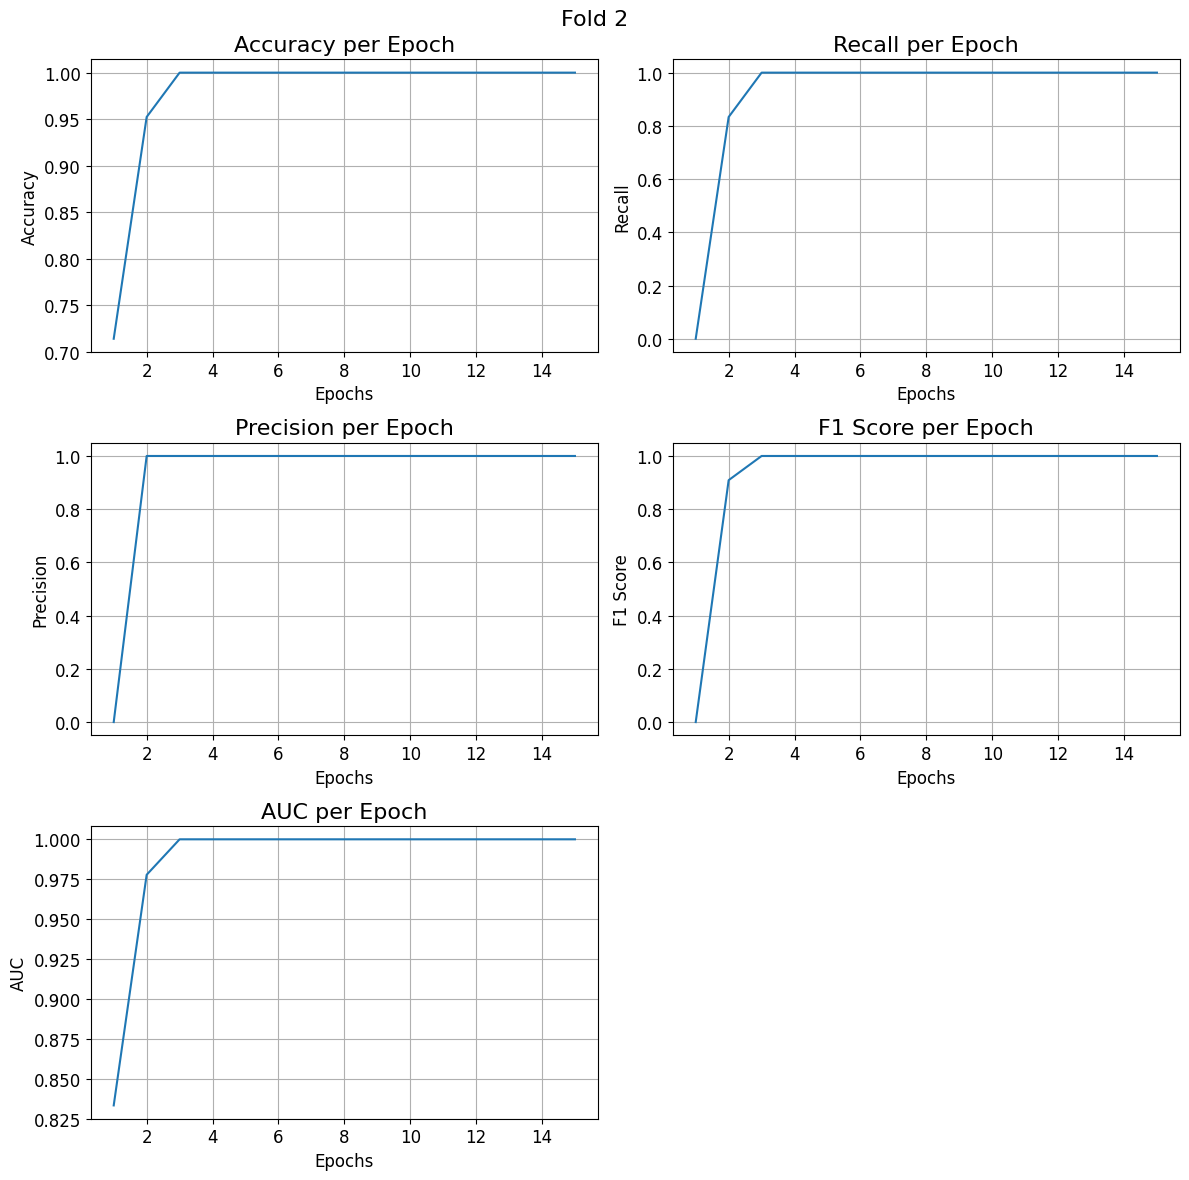

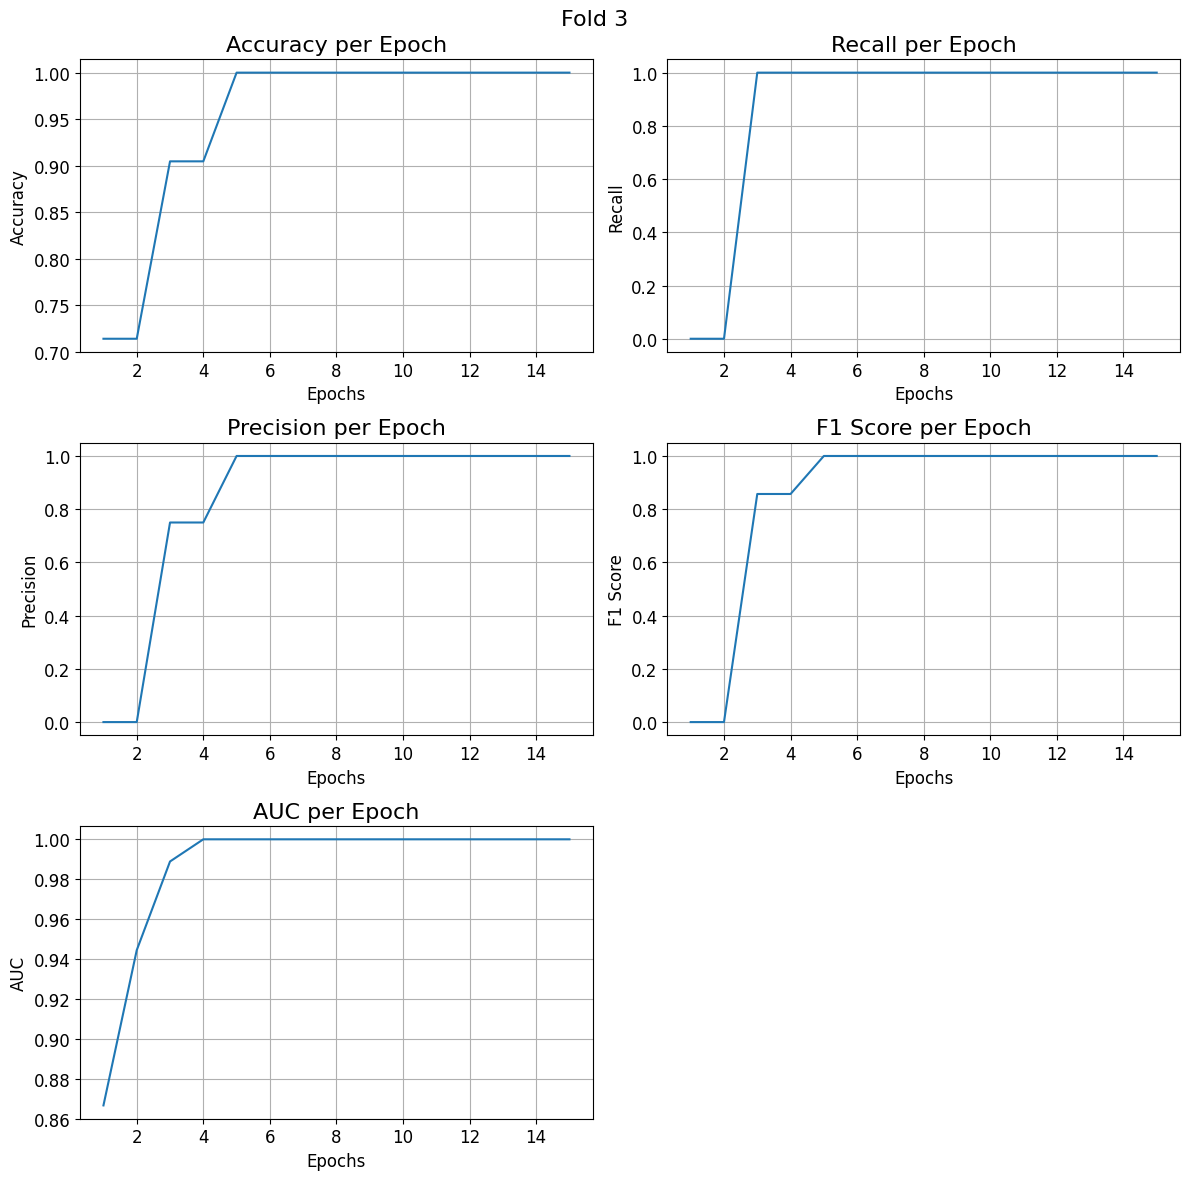

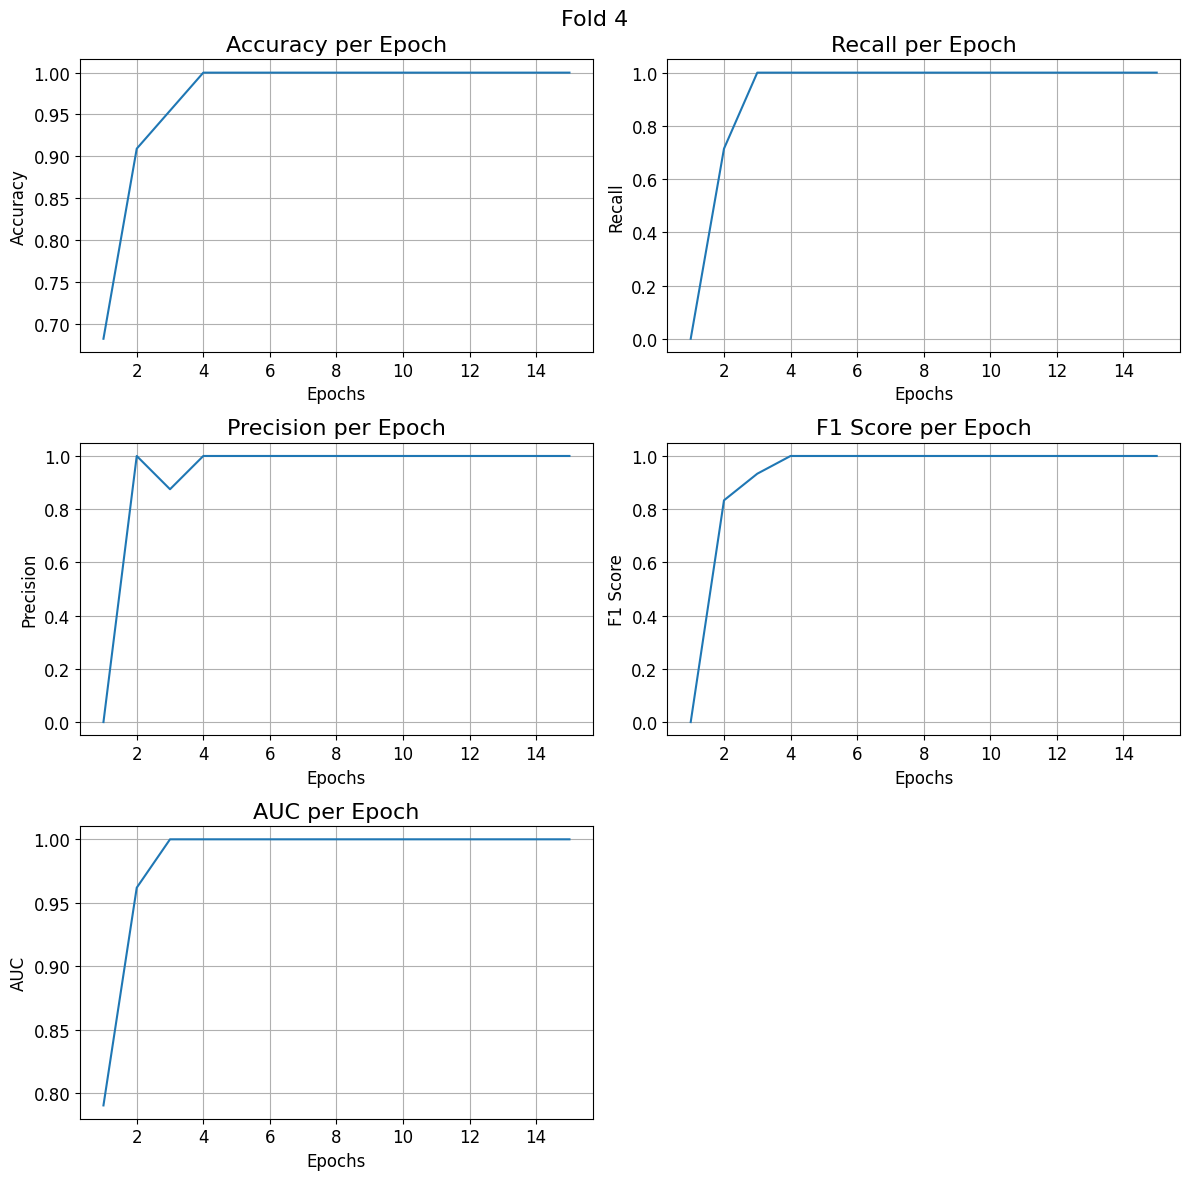

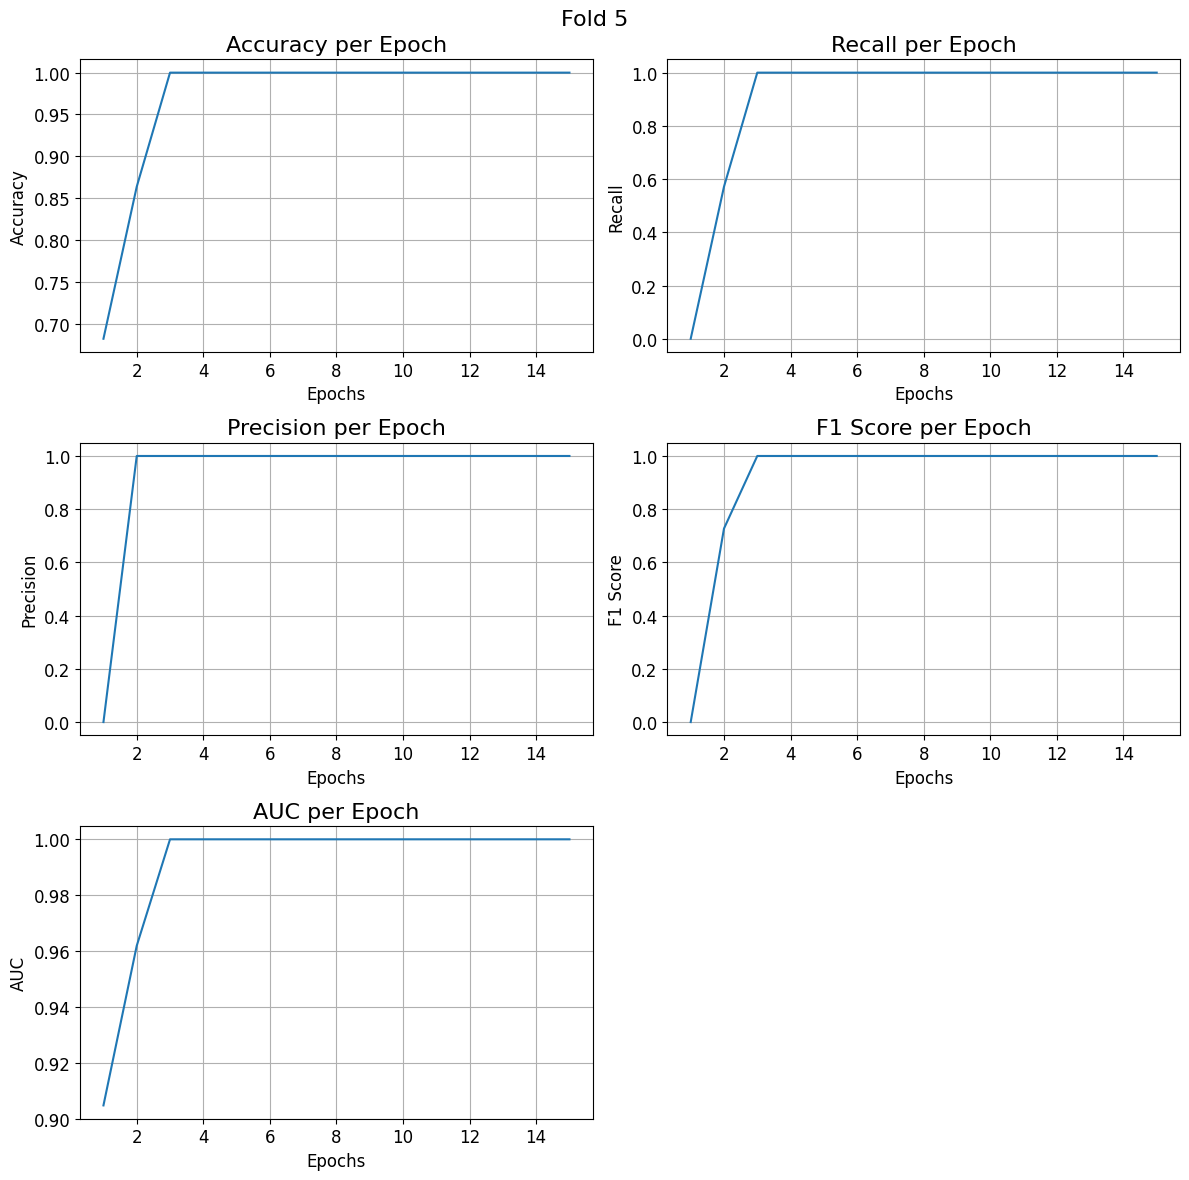

In [8]:
for fold in range(0, 5):
    train_df = pd.read_csv(train_csv_file_path)

    train_df = train_df[train_df['fold'] == fold]
    metrics = [
        ('accuracy_pangolin', 'Accuracy'),
        ('recall_pangolin', 'Recall'),
        ('precision_pangolin', 'Precision'),
        ('f1_pangolin', 'F1 Score'),
        ('auc_pangolin', 'AUC')
    ]

    plt.figure(figsize=(12, 12))
    plt.suptitle(f'Fold {fold + 1}', fontsize=16)


    for i, (pangolin_col, title) in enumerate(metrics, 1):
        plt.subplot(3, 2, i)
        plt.plot(train_df['epoch'], train_df[pangolin_col], label=f'{title} Pangolin')
        plt.title(f'{title} per Epoch', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel(title, fontsize=12)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid(True)

    plt.tight_layout()
    plt.show()


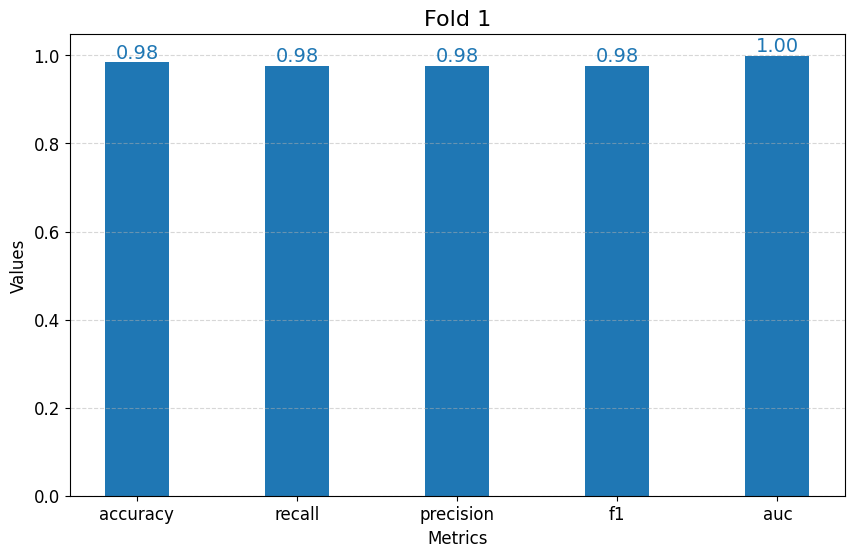

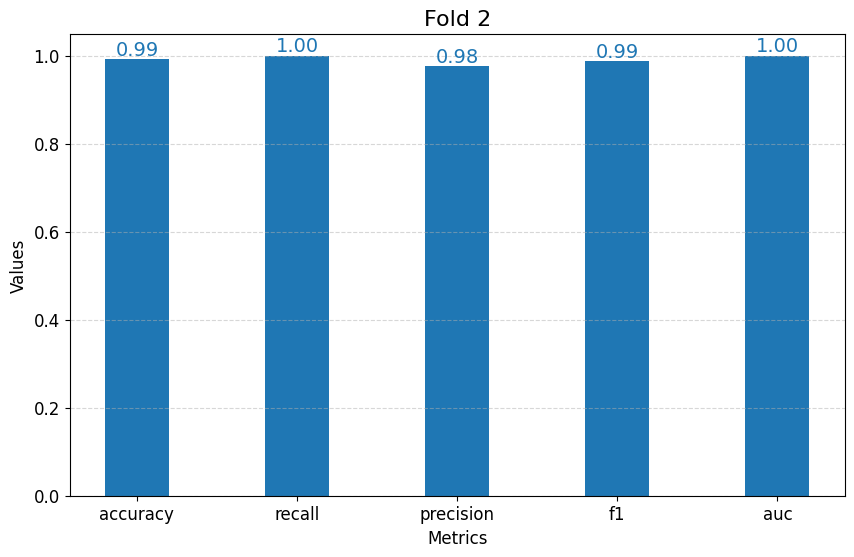

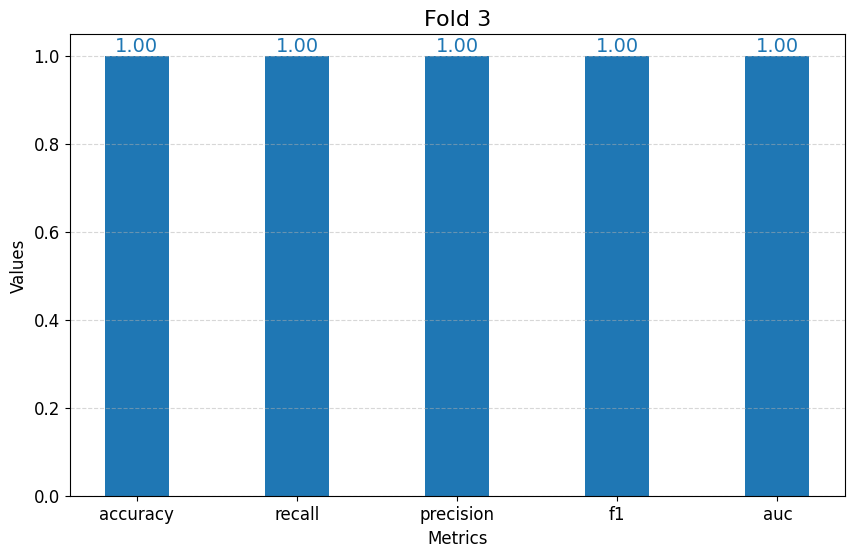

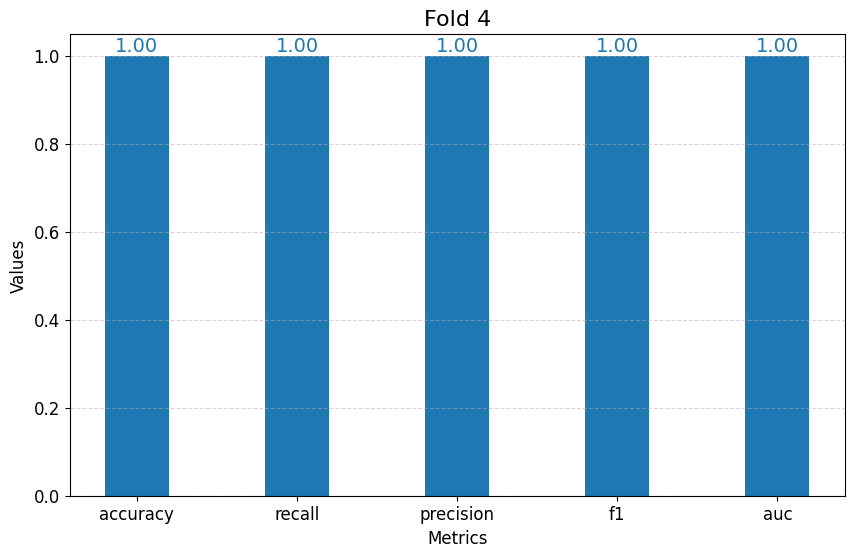

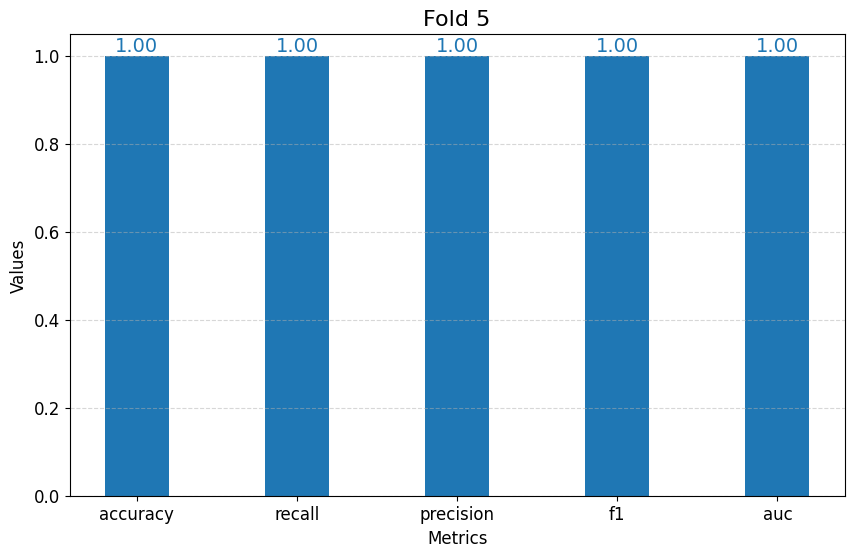

In [9]:
for fold in range(0, 5):
    test_df = pd.read_csv(test_csv_file_path)

    test_df = test_df[test_df['fold'] == fold]

    metrics = [
        'accuracy', 'recall', 'precision', 'f1', 'auc'
    ]

    pangolin_values = [
        test_df[f'{metric}_pangolin'].values[0] for metric in metrics
    ]

    x = range(len(metrics))

    plt.figure(figsize=(10, 6))
    plt.bar(x, pangolin_values, width=0.4, label='Pangolin', align='center')

    for i, pangolin in enumerate(pangolin_values):
        plt.text(i, pangolin, f'{pangolin:.2f}', ha='center', va='bottom', fontsize=14, color='#1f77b4')

    plt.xticks(x, metrics)
    plt.title('Fold ' + str(fold + 1), fontsize=16)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

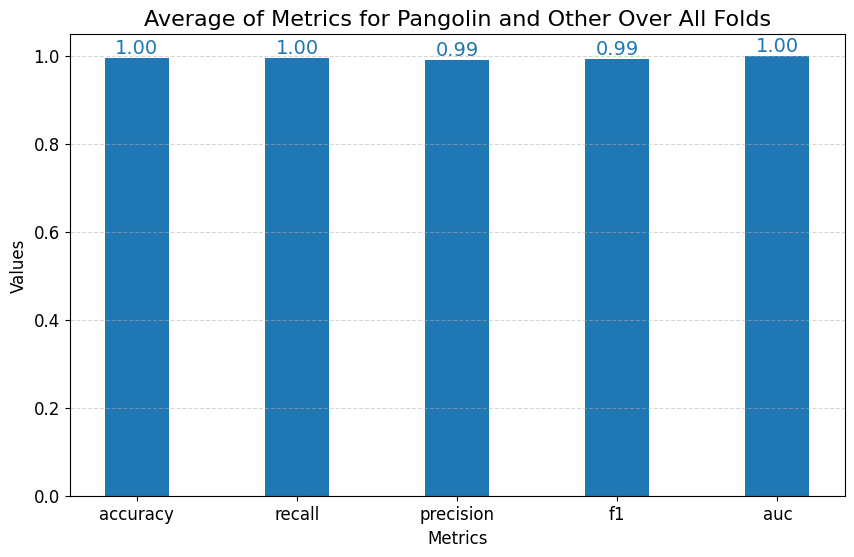

In [10]:
test_df = pd.read_csv(test_csv_file_path)

metrics = [
    'accuracy', 'recall', 'precision', 'f1', 'auc'
]

pangolin_values = [
    test_df[f'{metric}_pangolin'].mean() for metric in metrics
]
x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, pangolin_values, width=0.4, label='Pangolin', align='center')

for i, pangolin in enumerate(pangolin_values):
    plt.text(i, pangolin, f'{pangolin:.2f}', ha='center', va='bottom', fontsize=14, color='#1f77b4')


plt.xticks(x, metrics)
plt.title('Average of Metrics for Pangolin and Other Over All Folds', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()